In [2]:
import pandas as pd
df= pd.read_csv('turkey_earthquake_tweets.csv')
df
!pip install spacy
import spacy
spacy.cli.download("en_core_web_sm")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 8.4 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/srragulraj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/srragulraj/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
df = df.astype(str)
text_str_0 = ' '.join(df['text'].tolist()) 
text_str_0=text_str_0.lower()
text_str_0=text_str_0.replace("\'",'' )
import regex as re
punctuation = re.findall(r'\p{P}', text_str_0)
text_str_0

'@simonkjaer1989 @acmilan @acmilanbr @acmilanar @acmilanyouth hi simon, as a fenerbahçe supporter i did not hear any… https://t.co/nebqqfula4 hi people...any help here would be much appreciated....this is just a quick and legit reaction from myself just try… https://t.co/c7ogzzap64 @jlo @intimissimi #turkeyquake  we are in desperate please help jennifer i love you #ahbapdernegi #hatay #afad thank you rafael this means a lot 😭😭😭💜 #turkeyquake #türkiye #deprem https://t.co/8c0znbe0ws @adgpi hey @bbcworld try to cover these stories with absolute truth from #turkeyquake rather than making baseless d… https://t.co/nwmawkuw9m picture of the day.. 💞\n#turkeyquake #syrianeedshelp\n#helpsyrianpeople #earthquakeinsyria #isro #operationdost… https://t.co/q6hlbcdnkh to support those affected by earthquakes, use the charitys wallet:\neth\n\n0xd3bd9b3c442647daedf7ad8510b1480ba606ddd2… https://t.co/kwfkeekp9s you cant believe what you see here...\n\n#turkeysyriaearthquake #earthquaketurkey https://t.

In [45]:
import re

text_with_emojis = text_str_0

emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emojis in the first group
                           u"\U0001F300-\U0001F5FF"  # Emojis in the second group
                           u"\U0001F680-\U0001F6FF"  # Emojis in the third group
                           u"\U0001F700-\U0001F77F"  # Emojis in the fourth group
                           u"\U0001F780-\U0001F7FF"  # Emojis in the fifth group
                           u"\U0001F800-\U0001F8FF"  # Emojis in the sixth group
                           u"\U0001F900-\U0001F9FF"  # Emojis in the seventh group
                           u"\U0001FA00-\U0001FA6F"  # Emojis in the eighth group
                           u"\U0001FA70-\U0001FAFF"  # Emojis in the ninth group
                           u"\U0001F004-\U0001F0CF"  # Additional emojis
                           u"\U0001F170-\U0001F251"  # Additional emojis
                           "]+", flags=re.UNICODE)

text = emoji_pattern.sub(r'', text_with_emojis)

half_length = len(text) // 4 


half = text[:half_length]

print(half)




@simonkjaer1989 @acmilan @acmilanbr @acmilanar @acmilanyouth hi simon, as a fenerbahçe supporter i did not hear any… https://t.co/nebqqfula4 hi people...any help here would be much appreciated....this is just a quick and legit reaction from myself just try… https://t.co/c7ogzzap64 @jlo @intimissimi #turkeyquake  we are in desperate please help jennifer i love you #ahbapdernegi #hatay #afad thank you rafael this means a lot  #turkeyquake #türkiye #deprem https://t.co/8c0znbe0ws @adgpi hey @bbcworld try to cover these stories with absolute truth from #turkeyquake rather than making baseless d… https://t.co/nwmawkuw9m picture of the day.. 
#turkeyquake #syrianeedshelp
#helpsyrianpeople #earthquakeinsyria #isro #operationdost… https://t.co/q6hlbcdnkh to support those affected by earthquakes, use the charitys wallet:
eth

0xd3bd9b3c442647daedf7ad8510b1480ba606ddd2… https://t.co/kwfkeekp9s you cant believe what you see here...

#turkeysyriaearthquake #earthquaketurkey https://t.co/qpcyst8vl5

In [46]:
import re

text = half

pattern = r'[@.]'

half = re.sub(pattern, '', text)

print(half)


simonkjaer1989 acmilan acmilanbr acmilanar acmilanyouth hi simon, as a fenerbahçe supporter i did not hear any… https://tco/nebqqfula4 hi peopleany help here would be much appreciatedthis is just a quick and legit reaction from myself just try… https://tco/c7ogzzap64 jlo intimissimi #turkeyquake  we are in desperate please help jennifer i love you #ahbapdernegi #hatay #afad thank you rafael this means a lot  #turkeyquake #türkiye #deprem https://tco/8c0znbe0ws adgpi hey bbcworld try to cover these stories with absolute truth from #turkeyquake rather than making baseless d… https://tco/nwmawkuw9m picture of the day 
#turkeyquake #syrianeedshelp
#helpsyrianpeople #earthquakeinsyria #isro #operationdost… https://tco/q6hlbcdnkh to support those affected by earthquakes, use the charitys wallet:
eth

0xd3bd9b3c442647daedf7ad8510b1480ba606ddd2… https://tco/kwfkeekp9s you cant believe what you see here

#turkeysyriaearthquake #earthquaketurkey https://tco/qpcyst8vl5 help turkey‼️⚠️
⚠️in the ea

In [48]:
import re

text = half

hashtag_pattern = r'#\w+'  
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'  # Matches URLs

text_clean = re.sub(hashtag_pattern, '', text)
text_clean = re.sub(url_pattern, '', text_clean)



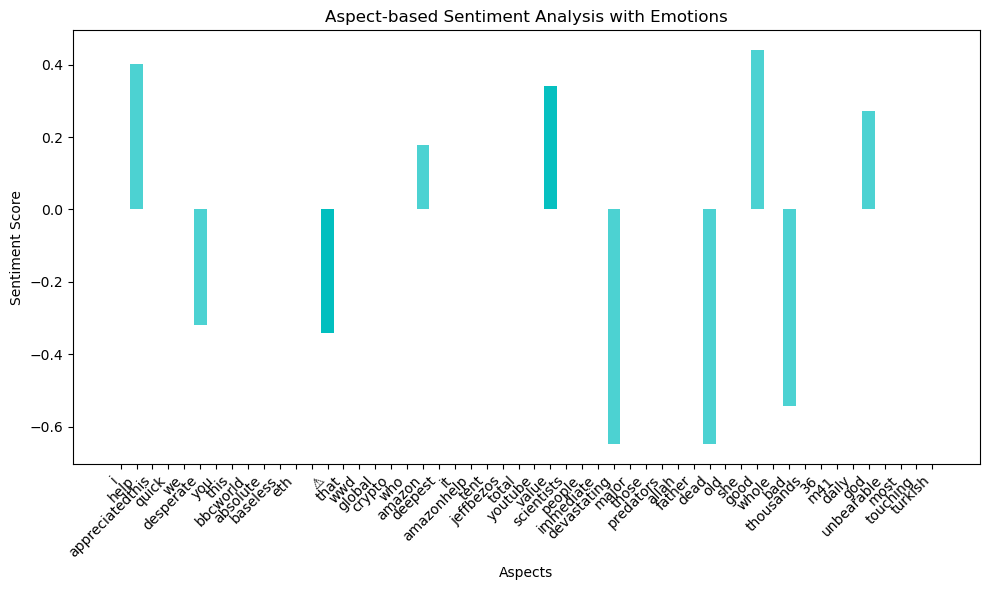

Aspect: i, Sentiment Score: 0.0, Emotion: neutral
Aspect: help, Sentiment Score: 0.4019, Emotion: happy
Aspect: appreciatedthis, Sentiment Score: 0.0, Emotion: neutral
Aspect: quick, Sentiment Score: 0.0, Emotion: neutral
Aspect: we, Sentiment Score: 0.0, Emotion: neutral
Aspect: desperate, Sentiment Score: -0.3182, Emotion: sad
Aspect: i, Sentiment Score: 0.0, Emotion: neutral
Aspect: you, Sentiment Score: 0.0, Emotion: neutral
Aspect: this, Sentiment Score: 0.0, Emotion: neutral
Aspect: bbcworld, Sentiment Score: 0.0, Emotion: neutral
Aspect: absolute, Sentiment Score: 0.0, Emotion: neutral
Aspect: baseless, Sentiment Score: 0.0, Emotion: neutral
Aspect: eth, Sentiment Score: 0.0, Emotion: neutral
Aspect: you, Sentiment Score: 0.0, Emotion: neutral
Aspect: you, Sentiment Score: 0.0, Emotion: neutral
Aspect: ️, Sentiment Score: 0.0, Emotion: neutral
Aspect: ⚠, Sentiment Score: -0.34, Emotion: sad
Aspect: that, Sentiment Score: 0.0, Emotion: neutral
Aspect: we, Sentiment Score: 0.0, Em

In [27]:
!pip install vaderSentiment

import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

text = text_clean

def extract_aspects(text):
    doc = nlp(text)
    aspects = [token.text for token in doc if token.dep_ == "nsubj" or token.dep_ == "amod"]
    return aspects

aspects = extract_aspects(text)

analyzer = SentimentIntensityAnalyzer()

results = []
for aspect in aspects:
    sentiment_scores = analyzer.polarity_scores(aspect)
    
    if sentiment_scores['compound'] >= 0.05:
        emotion = 'happy'
    elif sentiment_scores['compound'] <= -0.05:
        emotion = 'sad'
    else:
        emotion = 'neutral'
    
    results.append((aspect, sentiment_scores['compound'], emotion))

aspects, sentiments, emotions = zip(*results)

plt.figure(figsize=(10, 6))
plt.bar(aspects, sentiments, color='c', alpha=0.7)
plt.xlabel('Aspects')
plt.ylabel('Sentiment Score')
plt.title('Aspect-based Sentiment Analysis with Emotions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print results
for aspect, sentiment, emotion in results:
    print(f"Aspect: {aspect}, Sentiment Score: {sentiment}, Emotion: {emotion}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/srragulraj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


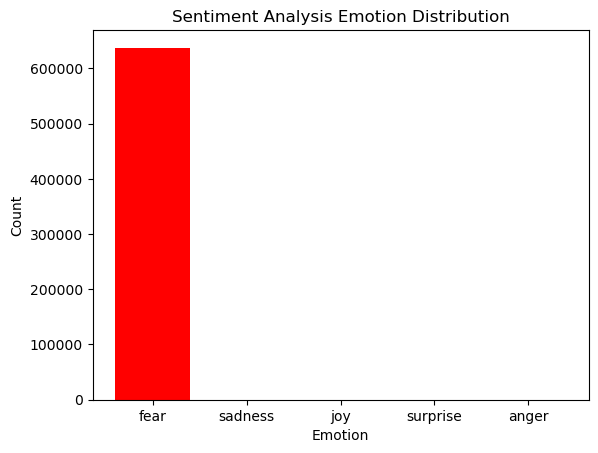

In [49]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download("vader_lexicon")

texts = text_clean

analyzer = SentimentIntensityAnalyzer()

emotion_counts = {
    "fear": 0,
    "sadness": 0,
    "joy": 0,
    "surprise": 0,
    "anger": 0,
}

for text in texts:
    sentiment_scores = analyzer.polarity_scores(text)
    
    if sentiment_scores["compound"] >= 0.05:
        emotion = "joy"
    elif sentiment_scores["compound"] <= -0.05:
        emotion = "sadness"
    else:
        emotion = "fear"
    
    emotion_counts[emotion] += 1

emotions = list(emotion_counts.keys())
count = list(emotion_counts.values())

plt.bar(emotions, count, color=['red', 'blue', 'green', 'orange', 'purple'])
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Sentiment Analysis Emotion Distribution")
plt.show()


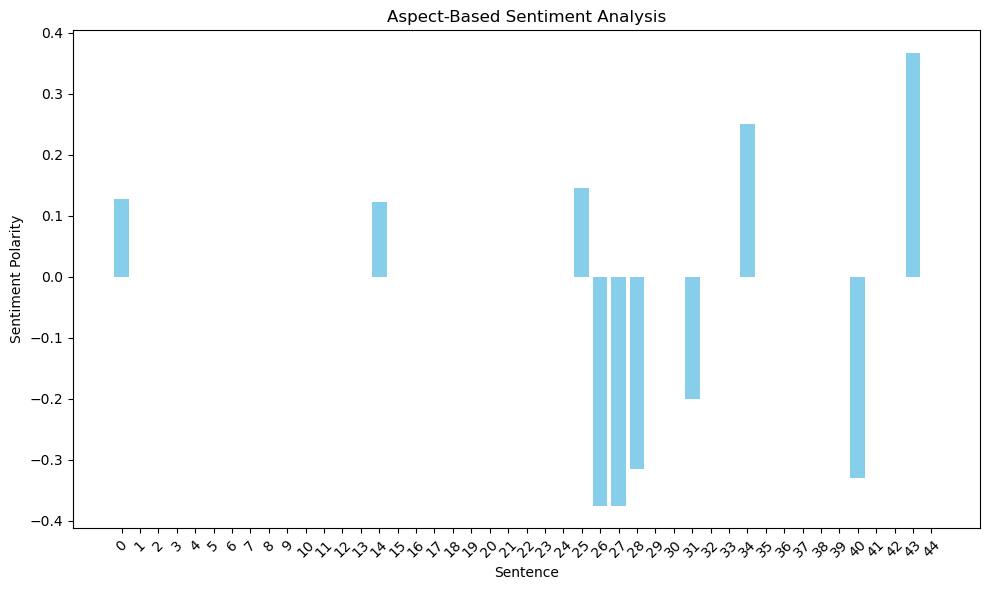

In [34]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

text_data = text_clean

sentences = [sentence.strip() for sentence in text_data.split('\n') if sentence.strip()]

df = pd.DataFrame({'Sentence': sentences})

def analyze_sentiment(sentence):
    analysis = TextBlob(sentence)
    
    sentiment = analysis.sentiment.polarity
    
    return sentiment

df['Sentiment'] = df['Sentence'].apply(analyze_sentiment)

plt.figure(figsize=(10, 6))

plt.bar(range(len(df)), df['Sentiment'], color='skyblue')
plt.xticks(range(len(df)), df.index, rotation=45)
plt.title('Aspect-Based Sentiment Analysis')
plt.xlabel('Sentence')
plt.ylabel('Sentiment Polarity')

plt.tight_layout()
plt.show()


In [6]:
df["text"]

0        @simonkjaer1989 @acmilan @acmilanbr @acmilanar...
1        Hi People...any help here would be much apprec...
2        @JLo @intimissimi #TurkeyQuake  we are in desp...
3        thank you rafael this means a lot 😭😭😭💜 #Turkey...
4        @adgpi Hey @BBCWorld try to cover these storie...
                               ...                        
28839    Alright lads I'll be going live in fifteen min...
28840    Photo of the week: The aftermath of the devast...
28841    "Hope for Turkey: A Fundraiser for Earthquake ...
28842    O Allah, protect the people of Turkey and Syri...
28843    Subscribe my YouTube channel for more informat...
Name: text, Length: 28844, dtype: object

In [13]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Define the sentence and aspects
sentence = "I got a new work, I am very happy"
aspects = ["life"]

# Define emotion labels
emotions = {
    "fear": 0,
    "sad": 1,
    "happy": 2
}


# Tokenize the sentence and aspects
inputs = tokenizer(sentence, return_tensors='pt', padding=True, truncation=True, max_length=128)

# Perform sentiment analysis for each aspect
for aspect in aspects:
    aspect_input = tokenizer(aspect, return_tensors='pt', padding=True, truncation=True, max_length=16)
    
    # Concatenate the aspect and sentence tokens
    combined_input = {
        'input_ids': torch.cat([aspect_input['input_ids'], inputs['input_ids']], dim=1),
        'attention_mask': torch.cat([aspect_input['attention_mask'], inputs['attention_mask']], dim=1)
    }

    # Get model predictions
    with torch.no_grad():
        outputs = model(**combined_input)

    # Extract the predicted emotion probabilities
    emotion_probs = torch.softmax(outputs.logits, dim=1)[0].tolist()

    # Map the emotion labels to probabilities
    emotion_predictions = {emotion: prob for emotion, prob in zip(emotions.keys(), emotion_probs)}

    # Print the results for each aspect
    print(f"Aspect: {aspect}")
    for emotion, prob in emotion_predictions.items():
        print(f"{emotion.capitalize()}: {prob:.4f}")
    print()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Aspect: life
Fear: 0.3977
Sad: 0.6023

